# Maya

## Research question/interests

My research questions focus on CO2 emissions and GDP. I have two main questions which are:

1. In recent times, how does the correlation between GDP and CO2 emissions compare in third world countries vs first world countries? Do these correlations hold during financial crises periods?

2. What percentage of CO2 emissions are first world and third world countries each presently responsible for? How has this changed over the years?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows=4) 
dataEmissions = dataEmissions.drop(dataEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1)
dataEmissions = dataEmissions.drop(dataEmissions.columns[[31, 32,33]], axis=1)

print(dataEmissions)

                    Country Name      1990      1991      1992      1993  \
0                          Aruba       NaN       NaN       NaN       NaN   
1    Africa Eastern and Southern  0.999038  0.953224  0.915661  0.916485   
2                    Afghanistan  0.191745  0.167682  0.095958  0.084721   
3     Africa Western and Central  0.478144  0.530016  0.568305  0.523529   
4                         Angola  0.553662  0.544539  0.543557  0.708984   
..                           ...       ...       ...       ...       ...   
261                       Kosovo       NaN       NaN       NaN       NaN   
262                  Yemen, Rep.  0.567037  0.690937  0.704793  0.627105   
263                 South Africa  6.729799  6.424622  6.175430  6.219194   
264                       Zambia  0.340930  0.349232  0.337224  0.289956   
265                     Zimbabwe  1.585444  1.713321  1.694416  1.539741   

         1994      1995      1996      1997      1998  ...      2010  \
0         NaN  

In [ ]:
dataGDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')
print(dataGDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

## Milestone 3 


## Task 1 - Exploratory Data Analysis

First I will analyze each dataset I'm investigating, individually

In [ ]:
print(dataEmissions2.shape)
print(dataEmissions2.dtypes)
dataEmissions2.describe()

(7144, 3)
Country Name      object
Year               int64
CO2 emissions    float64
dtype: object


,Year,CO2 emissions
count,7144.000000,7144.000000
mean,2004.539334,4.218163
std,8.644478,5.197455
min,1990.000000,0.000000
25%,1997.000000,0.673620
50%,2005.000000,2.460319
75%,2012.000000,6.208712
max,2019.000000,50.954034


### Prepare Data For EDA 

In [ ]:
#Wrangle Data: Restructure data format of Emissions Data
dataEmissions = dataEmissions.melt(id_vars = ["Country Name"])
dataEmissions2 = dataEmissions.copy(deep = False )

#Process Data: Rename rows in restruced Emissions data 
dataEmissions2.rename(columns={dataEmissions2.columns[1]: 'Year', dataEmissions2.columns[2]: 'CO2 emissions'},inplace=True)

#Clean Data: Drop rows that don't have CO2 emissions data 
dataEmissions2=dataEmissions2.dropna(subset=['CO2 emissions'])
dataEmissions2.to_csv(r'../data/processed/modifiedEmissions.csv', index=False)

#Process Data: Rename GDP column to make it mergable with CO2 emissions Data 
dataGDP.rename(columns={dataGDP.columns[0]: 'Country Name'}, inplace=True)
dataGDP.to_csv(r'../data/processed/modifiedGDP.csv', index=False)

#Process Data: Make sure GDP and data Emissions columns are of the same type int, else they aren't mergable
dataGDP['Year'] = dataGDP['Year'].astype(int)
dataEmissions2['Year'] = dataEmissions2['Year'].astype(int)

#Merge CO2 emissions data and GDP, keeping extra columns from GDP
mergeCO2AndGDP = pd.merge(dataGDP, dataEmissions2, on=['Country Name', 'Year'], how = 'left')

#Clean Data: Drop missing values and save data 
mergeCO2AndGDP = mergeCO2AndGDP.dropna(subset=['CO2 emissions'])
mergeCO2AndGDP.to_csv(r'../data/processed/CO2AndGDP.csv', index=False)



                     Country Name variable     value
0                           Aruba     1990       NaN
1     Africa Eastern and Southern     1990  0.999038
2                     Afghanistan     1990  0.191745
3      Africa Western and Central     1990  0.478144
4                          Angola     1990  0.553662
...                           ...      ...       ...
7975                       Kosovo     2019       NaN
7976                  Yemen, Rep.     2019  0.380633
7977                 South Africa     2019  7.507736
7978                       Zambia     2019  0.380717
7979                     Zimbabwe     2019  0.802979

[7980 rows x 3 columns]


## Task 1 - Exploratory Data Analysis

First I will analyze each dataset I'm investigating, individually

In [ ]:
print(f"Rows, Columns:  {dataEmissions2.shape}")
print()
print("Column Name    Column Type")
print(dataEmissions2.dtypes)
dataEmissions2.describe()

Rows, Columns:  (7144, 3)

Column Name    Column Type
Country Name      object
Year               int64
CO2 emissions    float64
dtype: object


,Year,CO2 emissions
count,7144.000000,7144.000000
mean,2004.539334,4.218163
std,8.644478,5.197455
min,1990.000000,0.000000
25%,1997.000000,0.673620
50%,2005.000000,2.460319
75%,2012.000000,6.208712
max,2019.000000,50.954034


In [ ]:

print(f"Rows, Columns:  {dataGDP.shape}")
print()
print("Column Name    Column Type")
print(dataGDP.dtypes)
dataGDP.describe()

Rows, Columns:  (6166, 4)

Column Name    Column Type
Entity                                                  object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2017 international $)    float64
dtype: object


,Year,"GDP per capita, PPP (constant 2017 international $)"
count,6166.000000,6166.000000
mean,2005.432533,17879.286262
std,8.841631,20132.683171
min,1990.000000,436.720367
25%,1998.000000,3678.829102
50%,2006.000000,10365.778320
75%,2013.000000,25832.031738
max,2020.000000,161971.468750


From this analysis, I can see that both data sets have a similar amount of rows and columns. This is good for my analysis since I will go on to merge these datasets. I can see from the summary statistics that the years vary slightly, so we will loose some of this data when the merge is performed. 

## Visualizations

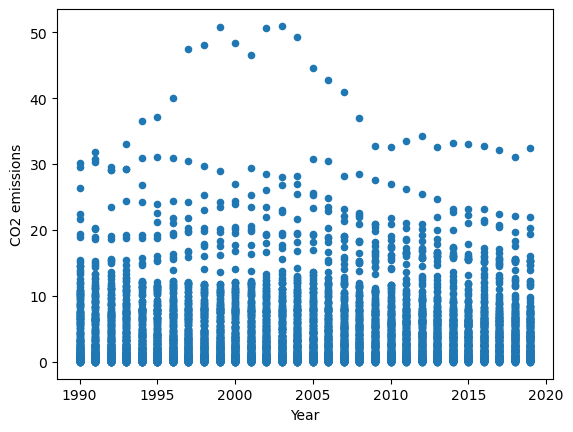

In [ ]:
#Visualization for CO2 emissions
plotEmissions = dataEmissions2.plot(kind='scatter', x='Year', y='CO2 emissions')


From this graph I can see that from roughly 1998 to 2007, CO2 emissions were incredibly high. This makes me curious as to what happened during these years to cause this, and which countries were responsible for it. I can also see that emissions of 15 metric tons (of CO2 emissions) per capita or below is very common, even still today just as much as ot was in 1990 (roughly). Overall, I can see that plotting every single data point available creates an overwhelming graph. For my later visualizations I will limit the amount of data points. 

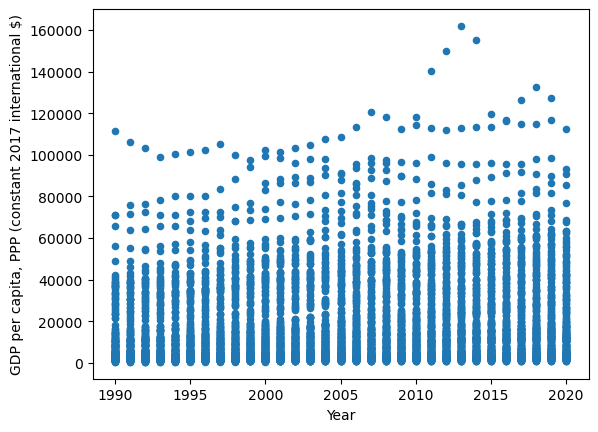

In [ ]:
#Visualization for GDP emissions
GDPEmissions = dataGDP.plot(kind='scatter', x='Year', y='GDP per capita, PPP (constant 2017 international $)')


This graph is less surprising to me. It is no surprise that GDP is slowly growing little by little. Again, I'm curious which countries lay near the top. Similar to the CO2 emissions graph I think it's best to limit the amount of data that I visualize. However just from looking at the two graphs, they have a very similar shape. Most of the data is concentrated near the bottom quarter for both graphs with a small percentage of data points scattering the top 3 quarters roughly. What I would like to see is if it's the same countries making up the top points/bottom points in both graphs. 

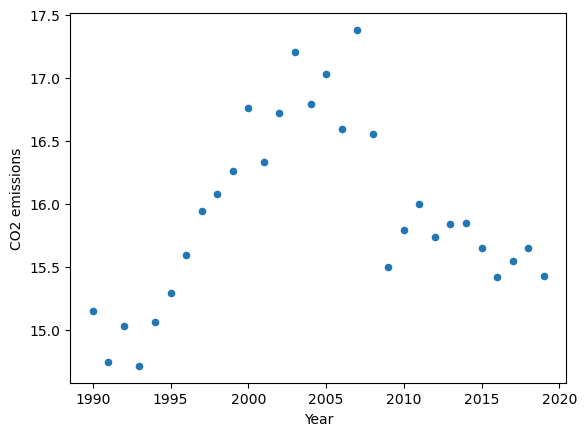

In [ ]:
#Visualization for CO2 emissions for Canada
emissionsCanada = dataEmissions2[dataEmissions2["Country Name"] == "Canada"]
plotCanadaEmissions.plot(ylim=(0,18))

plotCanadaEmissions = emissionsCanada.plot(kind='scatter', x='Year', y='CO2 emissions')



In an effort to limit the data that I'm plotting, I decided to focus on just Canada's CO2 emissions over the years by creating a new dataframe where I just grab the values corresponding to Canada. What I find interesting from this scatterplot is that it kind of has an upside down U shape. There was steady growth from 1990 til 2005. Then from 2005 to 2020 the values sort of zigzag in a downwards direction. This seems reflective of the country's efforts to reduce CO2 emissions in recent times

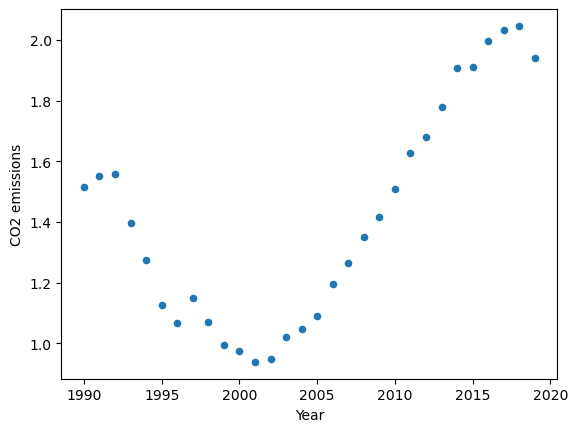

In [ ]:
#Visualization for CO2 emissions for Bolivia 
emissionsCanada = dataEmissions2[dataEmissions2["Country Name"] == "Bolivia"]
plotCanadaEmissions = emissionsCanada.plot(kind='scatter', x='Year', y='CO2 emissions')


I decided to compare Canada's CO2 emissions with a developing nation's CO2 emissions. I chose Bolivia because I am of a Bolivian background and it interested me to see Bolivia's CO2 emissions. I did not expect to see a graph that seems almost the complete opposite of Canada's. Bolivia's CO2 emissions interestingly, decreased from 1990 to 2000 and from then on steadily increased til about 2019. It's not clear if the decrease in emissions in 2020 is due to covid or is the result of an intentional effort to decrease emissions. 

In my later visualizations I'm looking forward to analyzing more developing countries CO2 emissons in comparison to developing countries, and seeing how/if GDP relates. 

It  should also be noted that the metric tons (of CO2 emissions) per capita for Bolivia range from 0.5 to 2.5 where, Canada ranges from 14 to 18. This is a giant discrepancy. In my later visualizations I will have to adjust the y axis to make an improved comparison. 

### Task 2 - Data Analysis Pipeline


1. Load Data (Done in cell 1 and 2)
2. Clean Data (Done in cell 1 and 3) 
3. Process Data (Done in cell 3)
4. Wrangle Data (Done in cell 3)  

### Task 3 - Method Chaining and Writing Python Programs 

### Task 4 - Answering My Research Questions 

1. In recent times, how does the correlation between GDP and CO2 emissions compare in third world countries vs first world countries? Do these correlations hold during financial crises periods?

2. What percentage of CO2 emissions are first world and third world countries each presently responsible for? How has this changed over the years?